Installing tfds (tensorflow dataset) :

In [ ]:
!pip install -q tfds-nightly
!tfds --version

     |████████████████████████████████| 3.7MB 10.2MB/s 
2020-12-04 15:11:26.577125: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
TensorFlow Datasets: 4.1.0+nightly


Clone the source repo from GitHub

In [ ]:
!git clone "https://github.com/heolfief/Where_is_Waldo_AI_solver.git"

Cloning into 'Where_is_Waldo_AI_solver'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 1), reused 26 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


Create the images for the dataset

In [ ]:
!python Where_is_Waldo_AI_solver/scripts/image_cutter.py

Building the dataset from the python script:

In [ ]:
!tfds build Where_is_Waldo_AI_solver/scripts/create_TFDS.py --overwrite

2020-12-04 15:57:26.753050: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-04 15:57:29.085164: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2020-12-04 15:57:29.149698: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
I1204 15:57:29.217836 140707959838592 build.py:345] download_and_prepare for dataset waldo_dataset/1.0.0...
I1204 15:57:29.220088 140707959838592 dataset_builder.py:393] Generating dataset waldo_dataset (/root/tensorflow_datasets/waldo_dataset/1.0.0)
2020-12-04 15:57:29.285102: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
202

Testing the dataset :

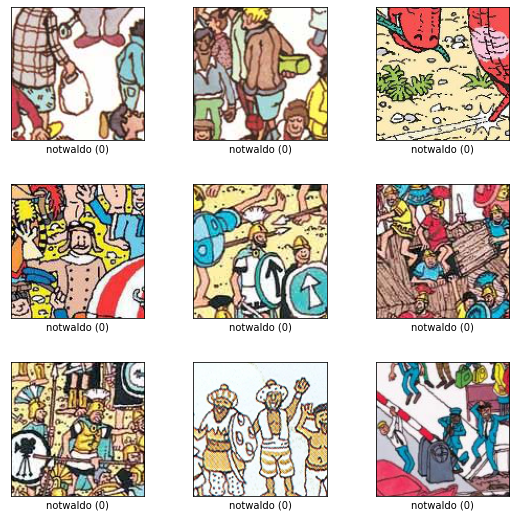

In [ ]:
import tensorflow_datasets as tfds
ds, ds_info = tfds.load('waldo_dataset', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)


**Build CNN :**

In the menu "Execution" -> modify execution type and select GPU. Once execution type is correctly configured, the GPU model should appaers below 

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13098588607028042073, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6117080236627881678
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14616579243370763947
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2779797221901594726
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Load dataset in a dataset class :

In [ ]:
CNN = Sequential()
CNN.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(128,128,3)))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(32, (5, 5), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Flatten())
# add 3 hiden layers 
# TO DO
CNN.add(Dense(units=200, activation='tanh'))
#CNN.add(Dense(units=84, activation='tanh'))
#CNN.add(Dense(units=10, activation='softmax'))

CNN.summary()